## Student Performance

### 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course

### 2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

### Dataset information
gender : sex of students -> (Male/female)\
race/ethnicity : ethnicity of students -> (Group A, B, C, D, E)\
parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)\
lunch : having lunch before test (standard or free/reduced)
test preparation course : complete or not complete before test
math score\
reading score\
writing score

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/jensontmathew/Documents/My_Projects/Myprojects/notebook/data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


df.describe()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


The data had 1000 rows and no null values

In [5]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

### Exploring Data


### Insight
From above description of numerical data, all means are very close to each other - between 66 and 68.05;\
All standard deviations are also close - between 14.6 and 15.19;\
While there is a minimum score 0 for math, for writing minimum is 10 and for reading minimum is 17

In [9]:
print("Categories in Gender :",end=" ")
print(df['gender'].unique())
print("Categories in race_ethnicity :",end=" ")
print(df['race_ethnicity'].unique())
print("Categories in parental_level_of_education :",end=" ")
print(df['parental_level_of_education'].unique())
print("Categories in lunch :",end=" ")
print(df['lunch'].unique())
print("Categories in test_preparation_course :",end=" ")
print(df['test_preparation_course'].unique())

Categories in Gender : ['female' 'male']
Categories in race_ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch : ['standard' 'free/reduced']
Categories in test_preparation_course : ['none' 'completed']


In [10]:
numerical_features = [features for features in df.columns if df[features].dtype !='O']
categorical_features = [features for features in df.columns if df[features].dtype =='O']

In [11]:
print("We have {} numerical features :{}".format(len(numerical_features),numerical_features))
print("We have {} categorical features :{}".format(len(categorical_features),categorical_features))

We have 3 numerical features :['math_score', 'reading_score', 'writing_score']
We have 5 categorical features :['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding columns for "Total Score" and "Average"


In [12]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_fullmark = df[df['reading_score']==100]['total score'].count()
writing_fullmark = df[df['writing_score']==100]['total score'].count()
math_fullmark = df[df['math_score']==100]['total score'].count()

In [14]:
print(f'Number of students with full marks in Maths: {math_fullmark}')
print(f'Number of students with full marks in Writing: {writing_fullmark}')
print(f'Number of students with full marks in Reading: {reading_fullmark}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [15]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


### Insights
* From above values we get students have performed the worst in Maths\
* Best performance is in reading section

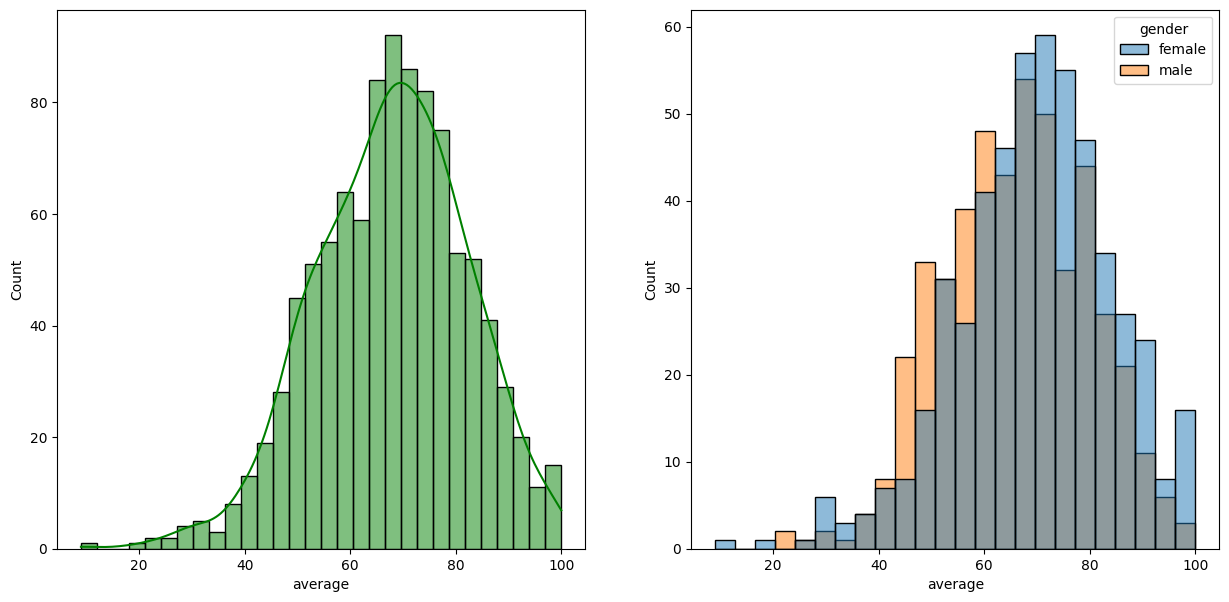

In [16]:
plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(x='average',data=df,bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(x='average',data=df,hue=df['gender'])
plt.show()

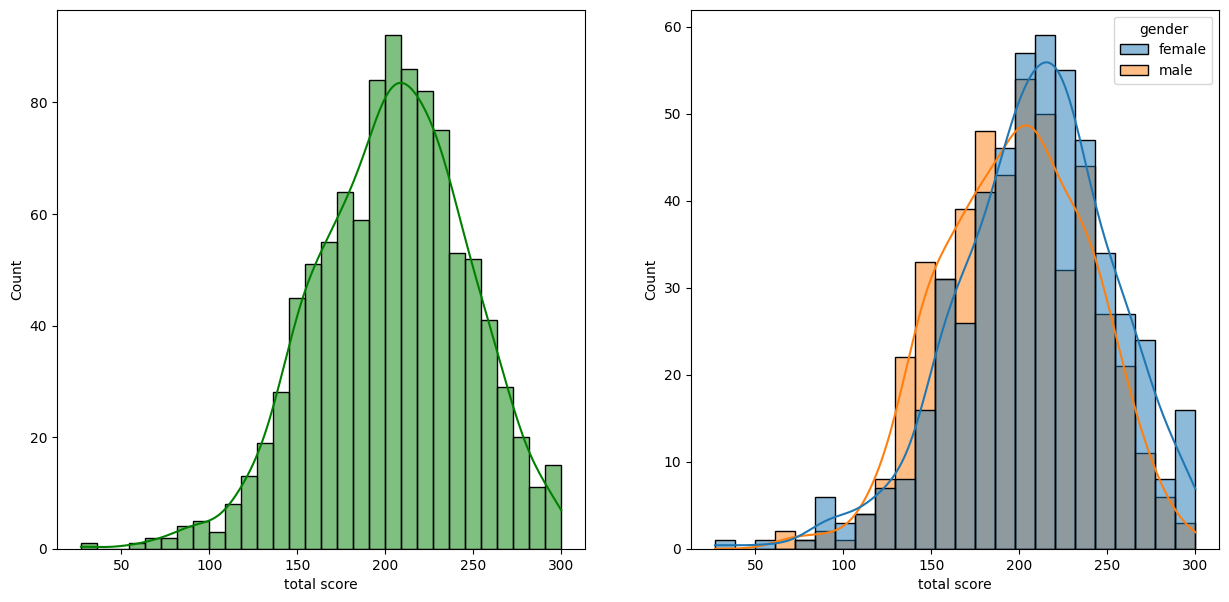

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

### Insights
* Female students tend to perform well then male students.

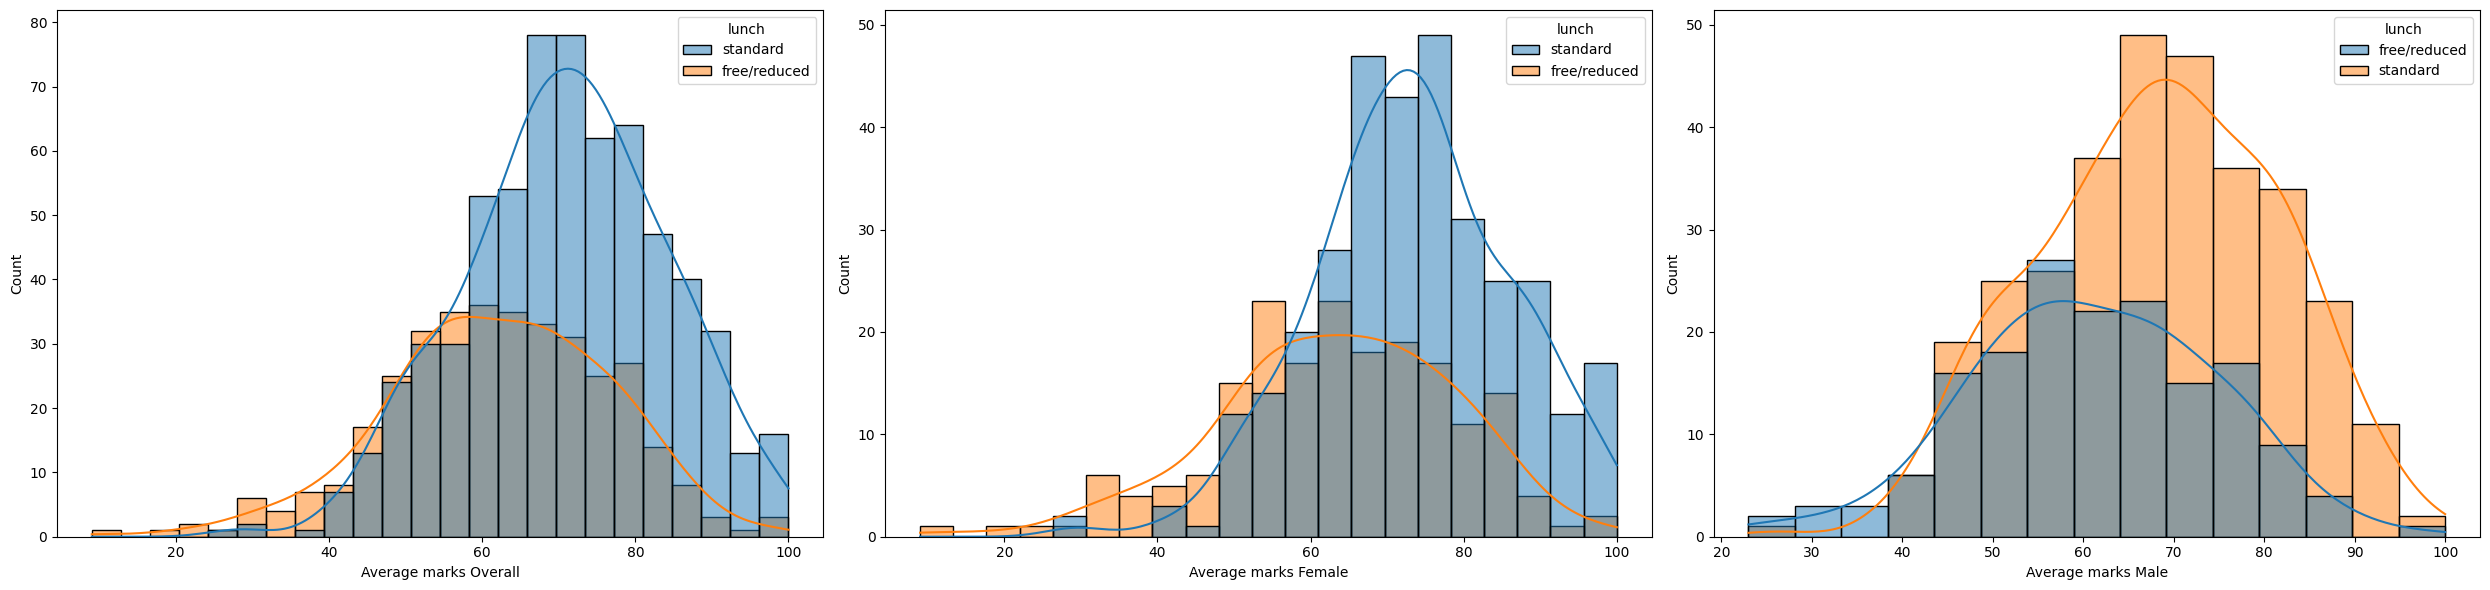

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 1x3 grid of subplots with a specified figure size
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# Plot the first subplot for overall average marks
sns.histplot(data=df, x='average', kde=True, hue='lunch', ax=axs[0])
axs[0].set_xlabel('Average marks Overall')

# Plot the second subplot for average marks for females
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch', ax=axs[1])
axs[1].set_xlabel('Average marks Female')

# Plot the third subplot for average marks for males
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch', ax=axs[2])
axs[2].set_xlabel('Average marks Male')

# Show the plot
plt.tight_layout()  # Adjusts the spacing between subplots
plt.show()


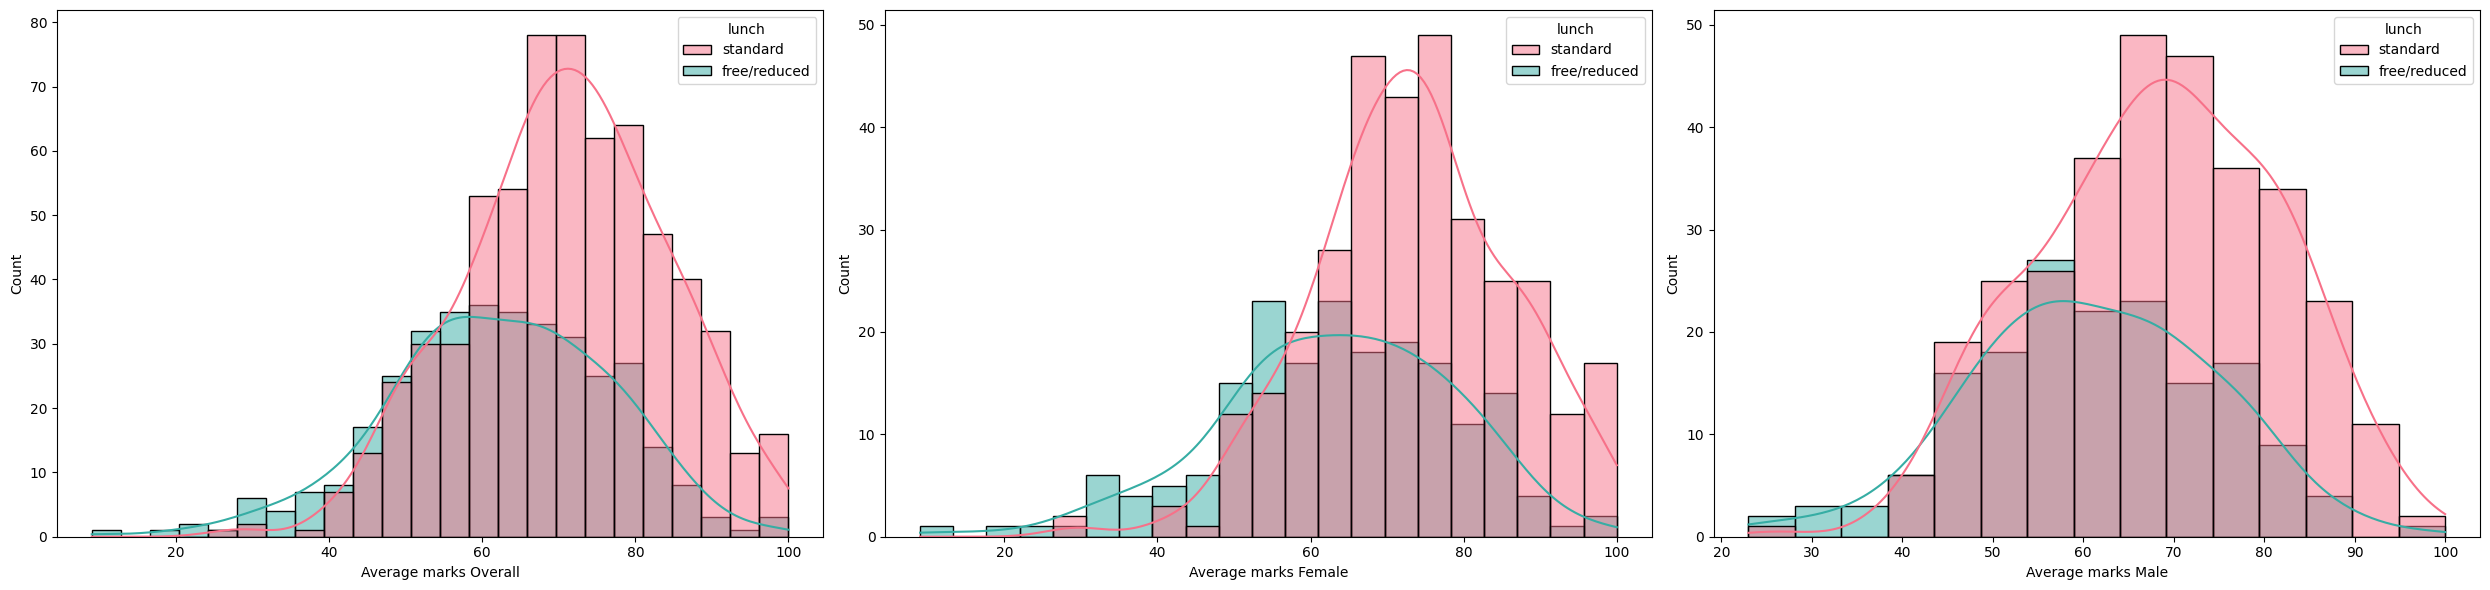

In [19]:

# Create a 1x3 grid of subplots with a specified figure size
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# Define a consistent color palette
palette = sns.color_palette("husl", 2)  # or any other color palette you prefer

# Define the order of the hue categories
hue_order = ['standard', 'free/reduced']  # Adjust based on your actual data

# Plot the first subplot for overall average marks
sns.histplot(data=df, x='average', kde=True, hue='lunch', ax=axs[0], palette=palette, hue_order=hue_order)
axs[0].set_xlabel('Average marks Overall')

# Plot the second subplot for average marks for females
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch', ax=axs[1], palette=palette, hue_order=hue_order)
axs[1].set_xlabel('Average marks Female')

# Plot the third subplot for average marks for males
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch', ax=axs[2], palette=palette, hue_order=hue_order)
axs[2].set_xlabel('Average marks Male')

# Show the plot
plt.tight_layout()  # Adjusts the spacing between subplots
plt.show()


#### Insights
* Standard lunch helps perform well in exams.\
* Standard lunch helps perform well in exams be it a male or a female.

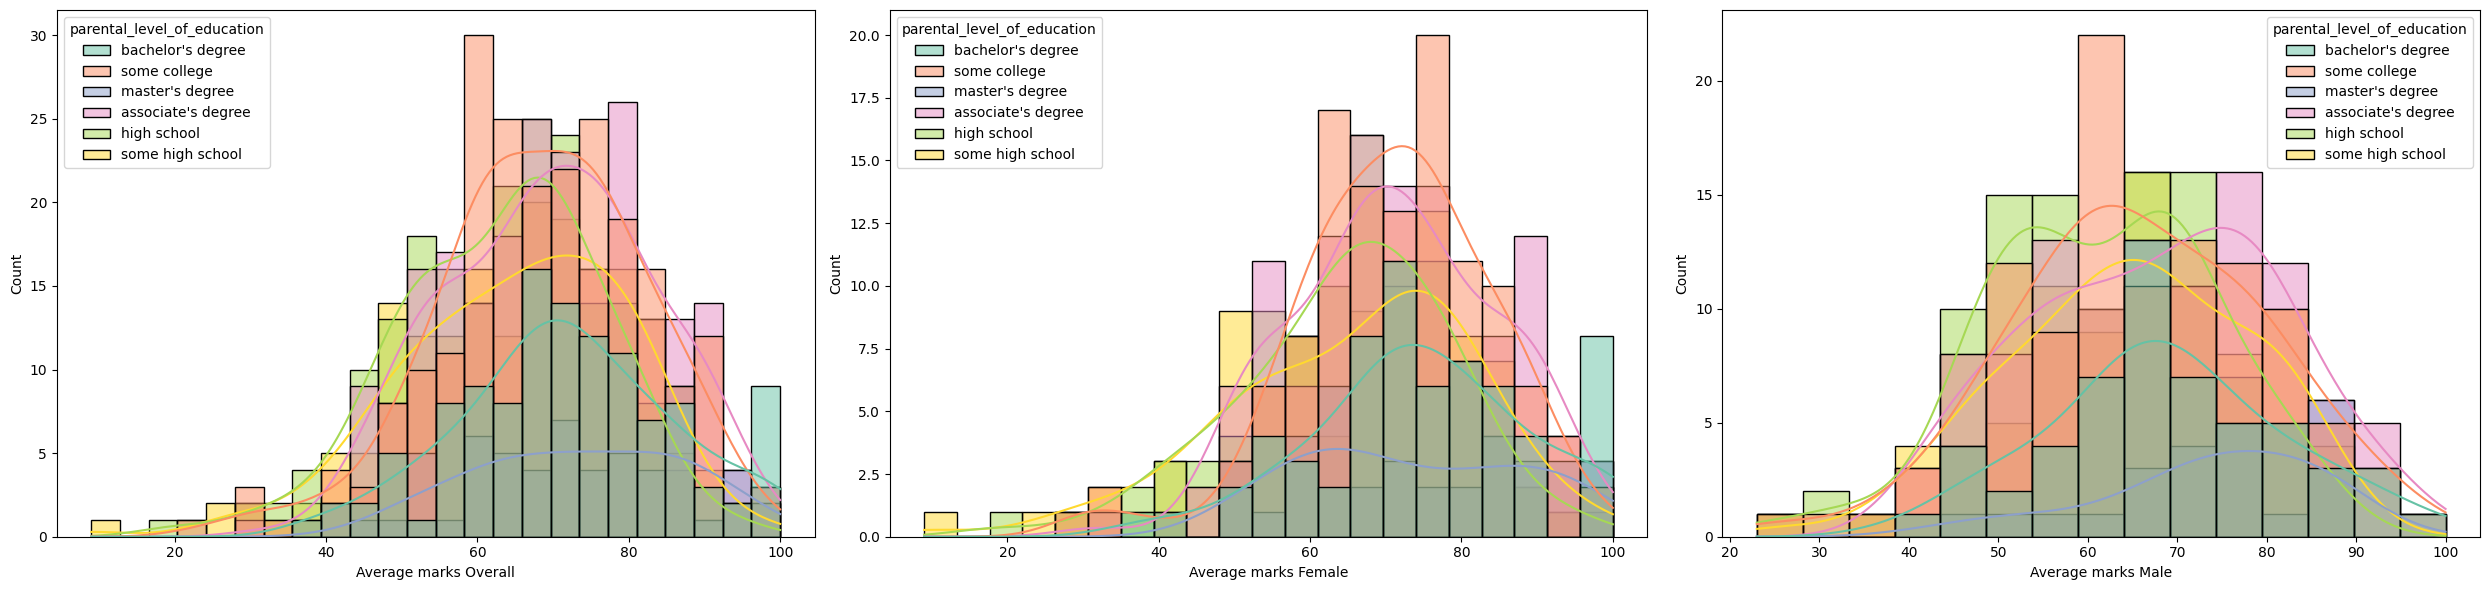

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 1x3 grid of subplots with a specified figure size
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# Define a color palette with enough colors
palette = sns.color_palette("Set2", 6)  # Ensure the palette has at least 6 colors

# Define the order of the hue categories
hue_order = [
    "bachelor's degree", 
    'some college', 
    "master's degree",
    "associate's degree", 
    'high school', 
    'some high school'
]

# Plot the first subplot for overall average marks
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education', ax=axs[0], palette=palette, hue_order=hue_order)
axs[0].set_xlabel('Average marks Overall')

# Plot the second subplot for average marks for females
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental_level_of_education', ax=axs[1], palette=palette, hue_order=hue_order)
axs[1].set_xlabel('Average marks Female')

# Plot the third subplot for average marks for males
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental_level_of_education', ax=axs[2], palette=palette, hue_order=hue_order)
axs[2].set_xlabel('Average marks Male')

# Show the plot
plt.tight_layout()  # Adjusts the spacing between subplots
plt.show()



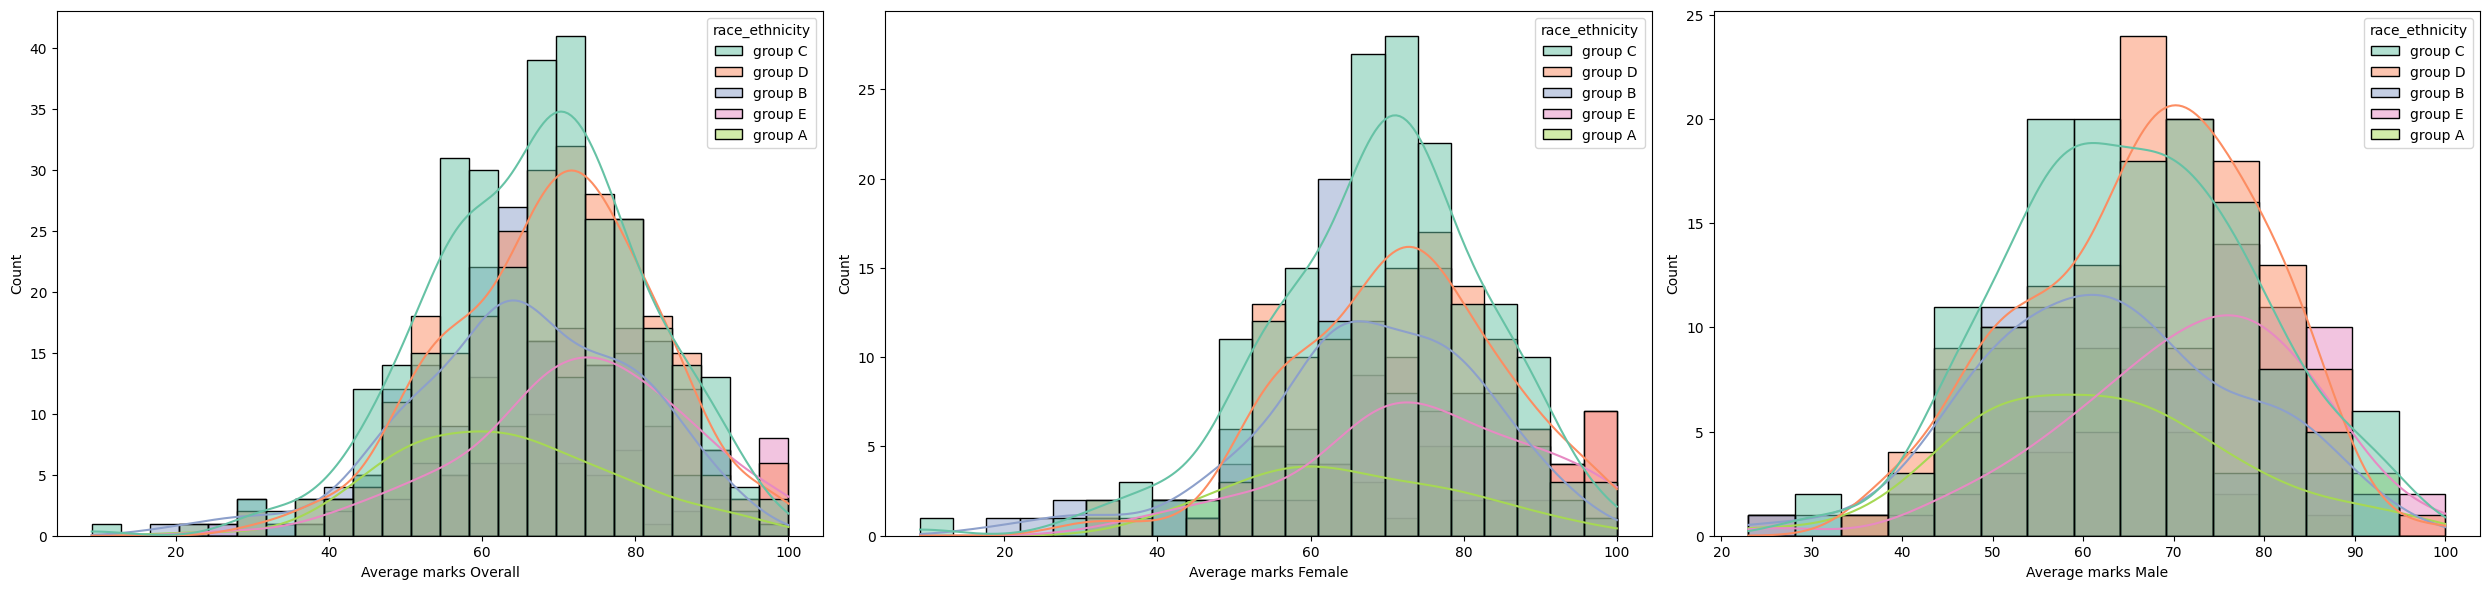

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 1x3 grid of subplots with a specified figure size
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# Define a color palette with enough colors
palette = sns.color_palette("Set2", 5)  # Ensure the palette has at least 6 colors

# Define the order of the hue categories
hue_order = ['group C', 'group D', 'group B', 'group E', 'group A']

# Plot the first subplot for overall average marks
sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity', ax=axs[0], palette=palette, hue_order=hue_order)
axs[0].set_xlabel('Average marks Overall')

# Plot the second subplot for average marks for females
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='race_ethnicity', ax=axs[1], palette=palette, hue_order=hue_order)
axs[1].set_xlabel('Average marks Female')

# Plot the third subplot for average marks for males
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='race_ethnicity', ax=axs[2], palette=palette, hue_order=hue_order)
axs[2].set_xlabel('Average marks Male')

# Show the plot
plt.tight_layout()  # Adjusts the spacing between subplots
plt.show()


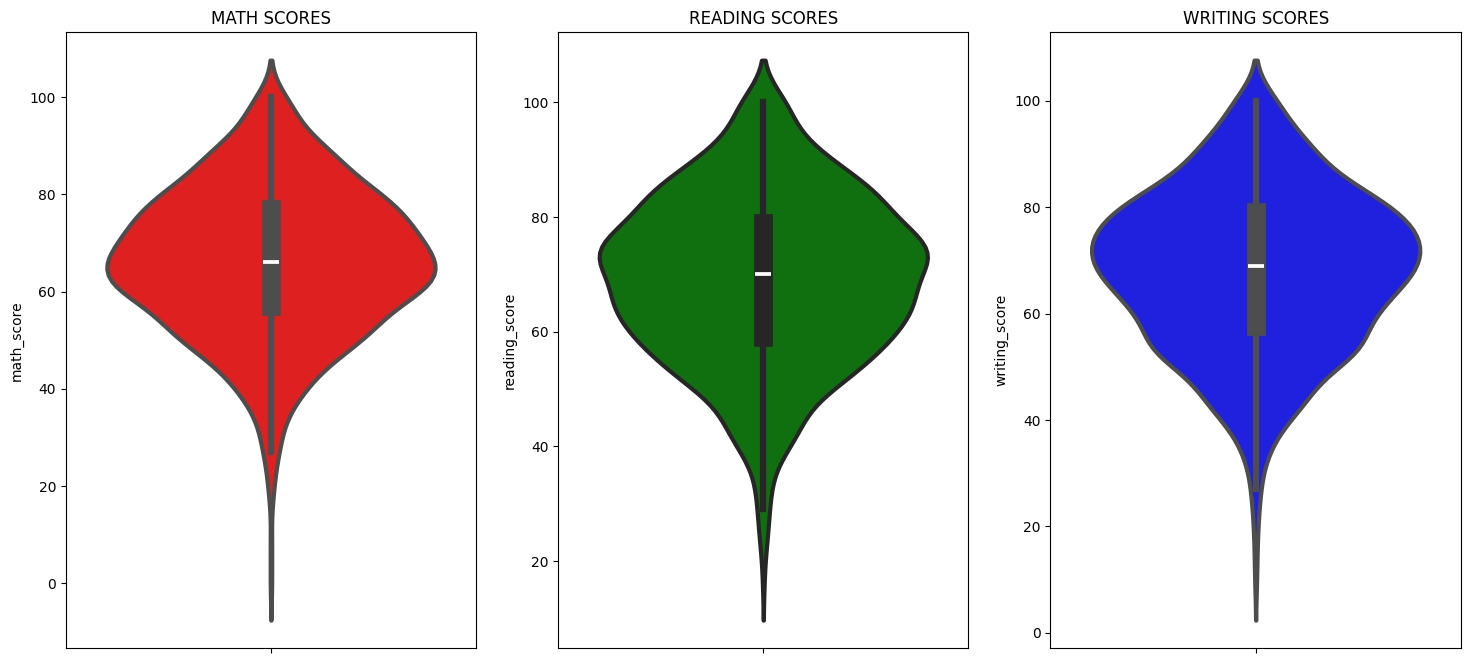

In [30]:
plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
* From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### Multivariate analysis using pieplot


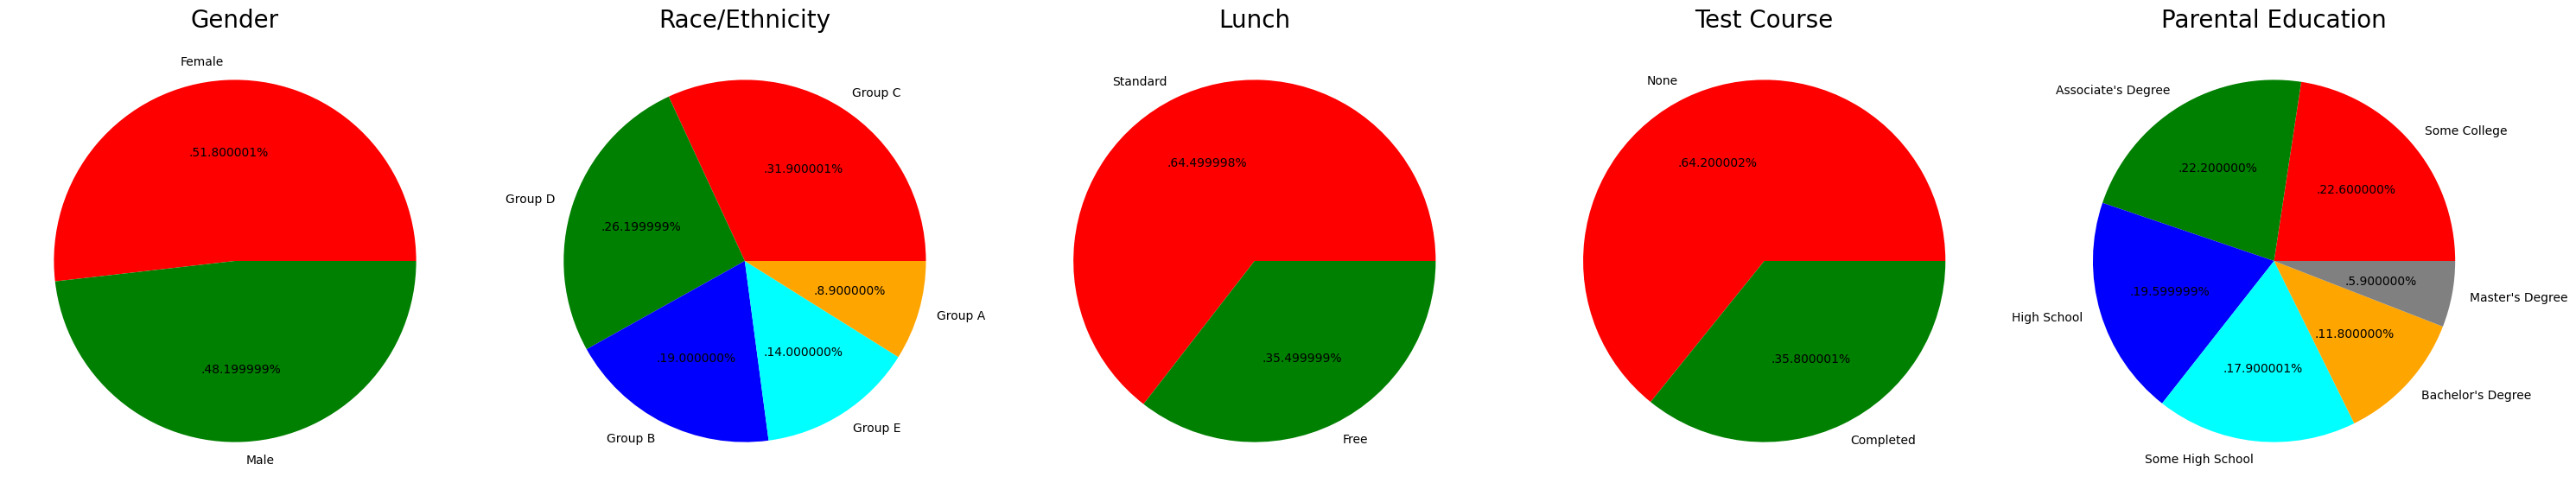

In [65]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### Insights
* Number of Male and Female students is almost equal
* Number students are greatest in Group C
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )


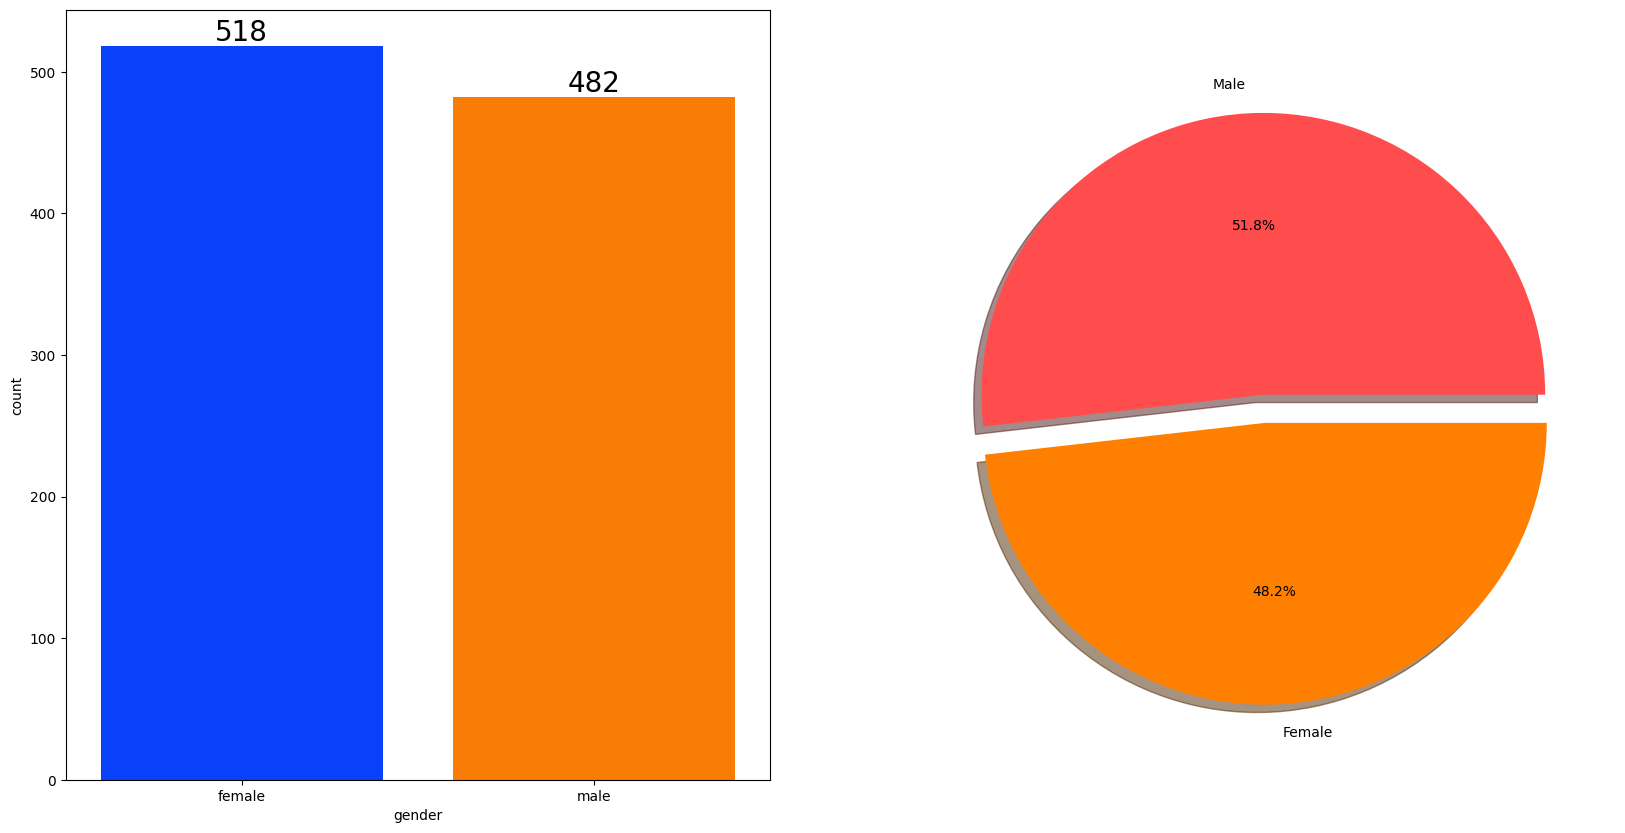

In [38]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95,hue = df['gender'])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights
* Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

### BIVARIATE ANALYSIS 

In [97]:
gender_group = df.groupby('gender')
gender_group

In [75]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [77]:
plt.figure(figsize=(10, 8))

X = ['total_score','average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

KeyError: 'average'

<Figure size 1000x800 with 0 Axes>

In [87]:
female_score= df[df['gender']=='female']['average']
male_score= df[df['gender']=='male']['average']

<Axes: ylabel='Frequency'>

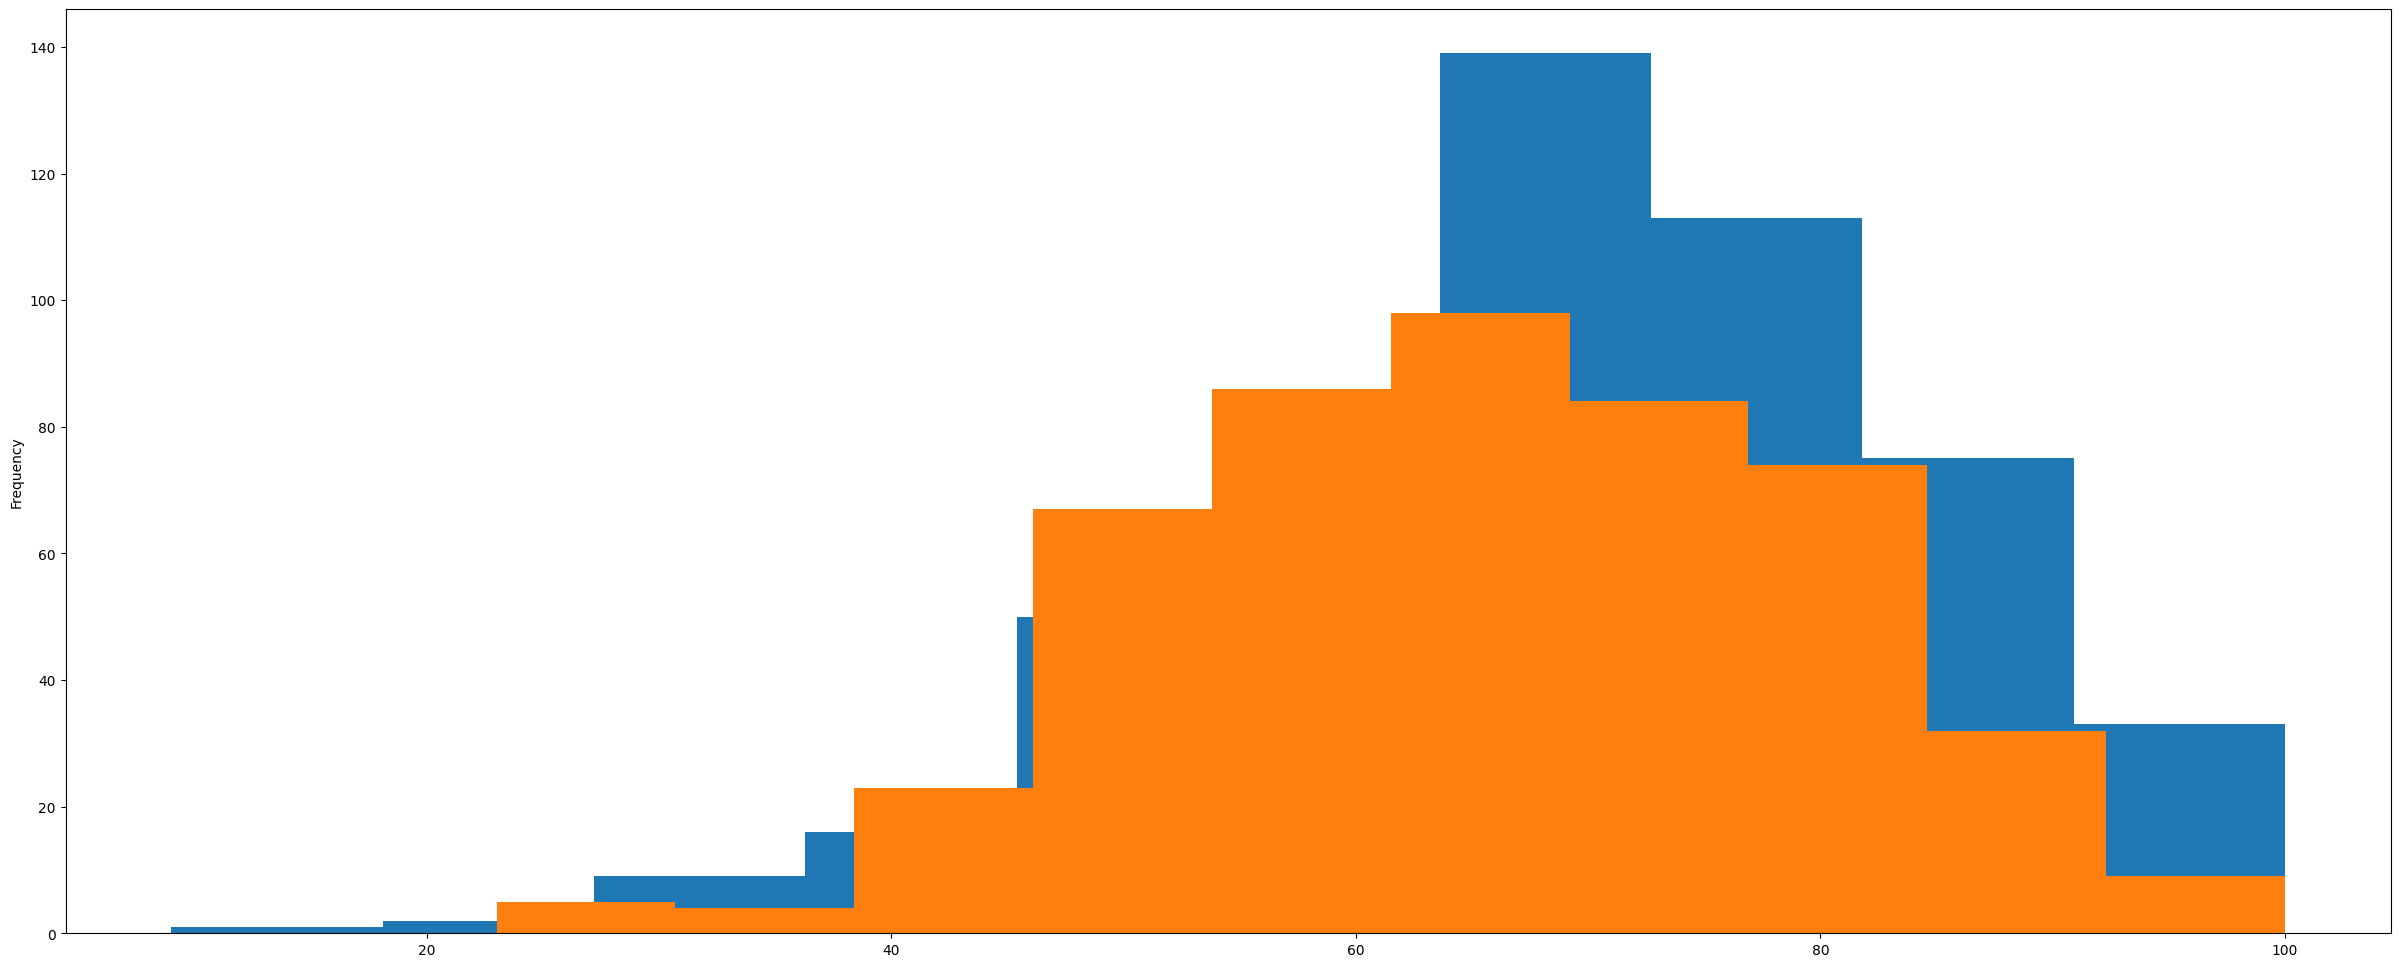

In [88]:
female_score.plot(kind='hist')
male_score.plot(kind='hist')

#### Insights
* On an average females have a better overall score than men whereas males have scored higher in Maths.

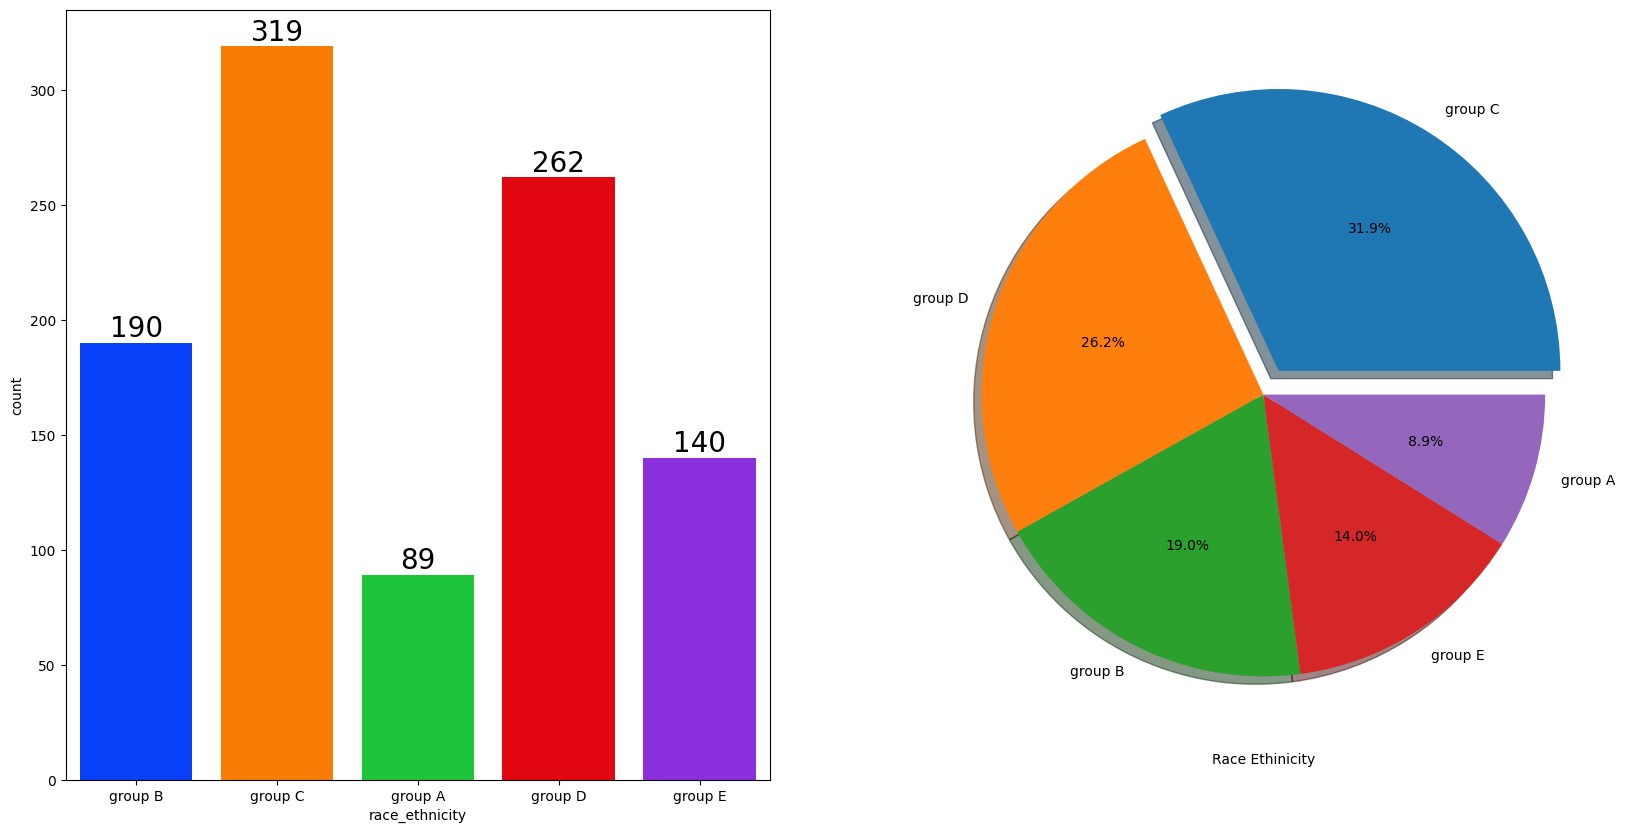

In [115]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95,hue=df['race_ethnicity'])
plt.xlabel('Race Ethinicity')

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.xlabel('Race Ethinicity')
plt.show() 

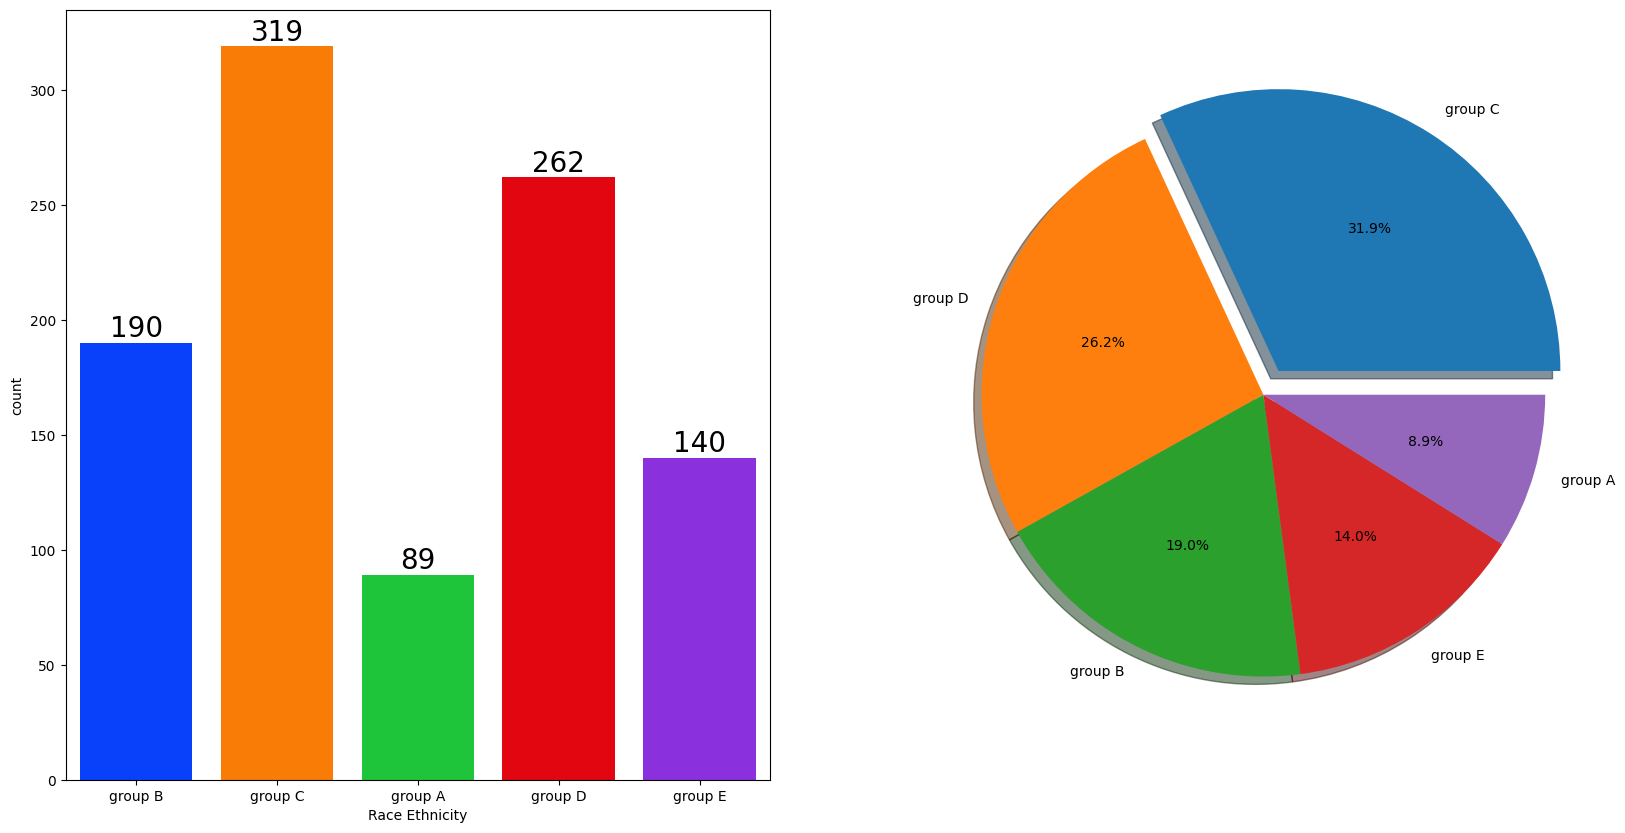

In [116]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Create the count plot
sns.countplot(x=df['race_ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95, hue=df['race_ethnicity'])

# Set x-label for the count plot
ax[0].set_xlabel('Race Ethnicity')

# Add labels to each bar
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Create the pie chart
ax[1].pie(x=df['race_ethnicity'].value_counts(),
          labels=df['race_ethnicity'].value_counts().index,
          explode=[0.1, 0, 0, 0, 0],
          autopct='%1.1f%%',
          shadow=True)

# Show the plot
plt.show()


### Checking Outliers

<Axes: >

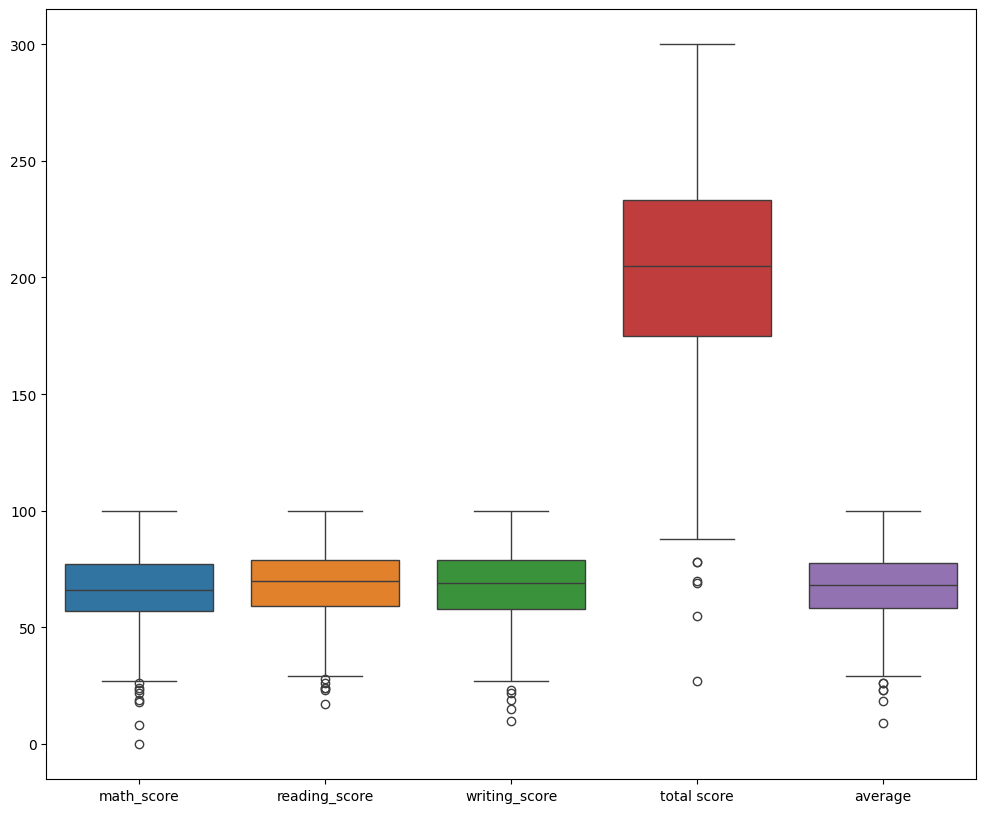

In [110]:
plt.figure(figsize=(12,10))
sns.boxplot(df)